In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('preprocessed_df.csv', header=0)
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,time_signature,popularity
count,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4.271000e+03,4271.000000,4271.000000
mean,0.616592,0.596990,-8.814688,0.081906,0.304600,0.147850,0.175377,0.482016,119.304114,5.211426,0.644580,2.051304e+05,3.943573,71.680403
std,0.171489,0.257139,6.473208,0.086027,0.335135,0.313641,0.140734,0.254416,28.021704,3.648877,0.478697,6.072841e+04,0.281099,12.451280
min,0.061100,0.000283,-41.665000,0.022700,0.000009,0.000000,0.010400,0.023800,31.270000,0.000000,0.000000,6.876000e+04,3.000000,0.000000
25%,0.516000,0.437000,-10.068000,0.035700,0.029800,0.000000,0.092700,0.272000,98.029500,2.000000,0.000000,1.670670e+05,4.000000,64.000000
50%,0.634000,0.655000,-6.781000,0.047200,0.149000,0.000016,0.117000,0.478000,120.032000,5.000000,1.000000,1.965200e+05,4.000000,74.000000
75%,0.739500,0.802000,-5.022500,0.083000,0.555500,0.010300,0.211500,0.688000,135.001500,8.000000,1.000000,2.350000e+05,4.000000,80.000000
max,0.967000,0.996000,-0.514000,0.906000,0.996000,0.995000,0.970000,0.980000,219.483000,11.000000,1.000000,1.622576e+06,5.000000,100.000000


In [3]:
df.shape

(4271, 20)

In [4]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key', 'mode',
       'duration_ms', 'time_signature', 'popularity', 'release_date',
       'track_title', 'track_artist', 'playlist_id', 'playlist_name', 'id'],
      dtype='object')

In [5]:
df['idx'] = df.groupby(['playlist_id']).ngroup()

In [7]:
res = dict(zip(df.idx, df.playlist_name))

In [8]:
res

{44: "Today's Top Hits",
 1: 'Top 50 - Global',
 19: 'RapCaviar',
 21: 'Viva Latino',
 14: 'Baila Reggaeton',
 11: 'Rock Classics',
 8: 'Songs to Sing in the Car',
 32: 'All Out 2000s',
 28: 'All Out 80s',
 37: 'Beast Mode',
 43: 'All Out 90s',
 29: 'Chill Hits',
 26: 'Mood Booster',
 23: 'Hot Country',
 3: 'Songs to Sing in the Shower',
 22: "I Love My '90s Hip-Hop",
 33: 'Peaceful Piano',
 0: 'Study lofi 📚',
 48: 'Esquenta Sertanejo',
 17: 'This Is BTS',
 13: 'Get Turnt',
 49: 'Motivation Mix',
 30: 'mint',
 47: 'Happy Hits!',
 34: 'Pop Up',
 38: 'Have a Great Day!',
 20: 'Christmas Hits',
 42: 'Dance Party',
 24: '90s Rock Anthems',
 45: 'Rock This',
 36: 'Workout',
 4: 'All Out 70s',
 41: 'Classic Road Trip Songs',
 9: 'lofi beats',
 15: 'Sleep',
 46: 'Hot Hits Philippines',
 5: 'Top Gaming Tracks',
 35: 'Your Favorite Coffeehouse',
 7: 'Power Workout',
 27: 'New Music Friday',
 12: 'Acoustic Covers',
 6: 'Acoustic Hits: Oldies but Goodies',
 16: 'Deep Focus',
 31: 'Confidence Boos

In [33]:
y_prep = df.idx
df_prep = df.drop(columns=['track_title', 'track_artist', 'playlist_id', 'playlist_name', 'id'])


In [34]:
df_prep

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,time_signature,popularity,release_date,idx
0,0.358,0.284,-8.285,0.0285,0.8050,0.000000,0.1830,0.276,99.796,7,1,180853,3,85,2022-12-09,44
1,0.637,0.643,-6.571,0.0519,0.1300,0.000002,0.1420,0.533,97.008,4,1,200690,4,97,2022-10-21,44
2,0.714,0.472,-7.375,0.0864,0.0130,0.000005,0.2660,0.238,131.121,2,1,156943,4,100,2022-09-22,44
3,0.780,0.689,-5.668,0.1410,0.0368,0.000010,0.0698,0.642,115.042,7,1,225389,4,93,2022-07-29,44
4,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,1,0,221520,4,89,2022-12-02,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,0.797,0.755,-5.393,0.0293,0.3310,0.000002,0.1240,0.411,129.955,2,1,135878,4,71,2020-11-23,25
4267,0.796,0.477,-7.161,0.1080,0.3140,0.000000,0.1200,0.685,119.928,1,1,231933,4,71,2004-03-23,25
4268,0.301,0.672,-4.497,0.0623,0.2800,0.000031,0.0609,0.384,169.497,2,1,230289,3,70,2017-06-23,25
4269,0.593,0.834,-3.738,0.0424,0.1150,0.000000,0.1910,0.555,151.944,10,1,196987,4,70,2022-06-07,25


In [12]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4271 non-null   float64
 1   energy            4271 non-null   float64
 2   loudness          4271 non-null   float64
 3   speechiness       4271 non-null   float64
 4   acousticness      4271 non-null   float64
 5   instrumentalness  4271 non-null   float64
 6   liveness          4271 non-null   float64
 7   valence           4271 non-null   float64
 8   tempo             4271 non-null   float64
 9   key               4271 non-null   int64  
 10  mode              4271 non-null   int64  
 11  duration_ms       4271 non-null   int64  
 12  time_signature    4271 non-null   int64  
 13  popularity        4271 non-null   int64  
 14  release_date      4271 non-null   object 
dtypes: float64(9), int64(5), object(1)
memory usage: 500.6+ KB


In [35]:
# we need to convert the release date to a date time object.
# if the release date is just the year, we'll set it to 01-01-yyyy
# if the release date is just the year + the month, we'll set it to 01-mm-yyyy
# this is done via the gorgeous pd.to_datetime function.


df_prep['release_date']=pd.to_datetime(df_prep['release_date'])

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   danceability      4271 non-null   float64       
 1   energy            4271 non-null   float64       
 2   loudness          4271 non-null   float64       
 3   speechiness       4271 non-null   float64       
 4   acousticness      4271 non-null   float64       
 5   instrumentalness  4271 non-null   float64       
 6   liveness          4271 non-null   float64       
 7   valence           4271 non-null   float64       
 8   tempo             4271 non-null   float64       
 9   key               4271 non-null   int64         
 10  mode              4271 non-null   int64         
 11  duration_ms       4271 non-null   int64         
 12  time_signature    4271 non-null   int64         
 13  popularity        4271 non-null   int64         
 14  release_date      4271 n

In [18]:
df_prep['release_date'].describe()

/var/folders/52/t2tzcl916c76rgmdn7l3hpk80000gn/T/ipykernel_26771/967411772.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_prep['release_date'].describe()


count                    4271
unique                   1226
top       2022-12-09 00:00:00
freq                      152
first     1942-01-01 00:00:00
last      2022-12-09 00:00:00
Name: release_date, dtype: object

In [36]:
# after this, we'll convert it to a number, which is the number of days ago (since today) it was released.
# we'll finally have a df of only int and float, which is far more easy to work with instead of dates.
df_prep['now']= pd.to_datetime(pd.datetime.now().date())


df_prep['counting_days'] = (df_prep['now'] - df_prep['release_date']).dt.days
df_prep['counting_days']
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   danceability      4271 non-null   float64       
 1   energy            4271 non-null   float64       
 2   loudness          4271 non-null   float64       
 3   speechiness       4271 non-null   float64       
 4   acousticness      4271 non-null   float64       
 5   instrumentalness  4271 non-null   float64       
 6   liveness          4271 non-null   float64       
 7   valence           4271 non-null   float64       
 8   tempo             4271 non-null   float64       
 9   key               4271 non-null   int64         
 10  mode              4271 non-null   int64         
 11  duration_ms       4271 non-null   int64         
 12  time_signature    4271 non-null   int64         
 13  popularity        4271 non-null   int64         
 14  release_date      4271 n

/var/folders/52/t2tzcl916c76rgmdn7l3hpk80000gn/T/ipykernel_26771/2319955295.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_prep['now']= pd.to_datetime(pd.datetime.now().date())


In [37]:
df_prep = df_prep.drop(columns=['release_date', 'now'])


In [38]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4271 non-null   float64
 1   energy            4271 non-null   float64
 2   loudness          4271 non-null   float64
 3   speechiness       4271 non-null   float64
 4   acousticness      4271 non-null   float64
 5   instrumentalness  4271 non-null   float64
 6   liveness          4271 non-null   float64
 7   valence           4271 non-null   float64
 8   tempo             4271 non-null   float64
 9   key               4271 non-null   int64  
 10  mode              4271 non-null   int64  
 11  duration_ms       4271 non-null   int64  
 12  time_signature    4271 non-null   int64  
 13  popularity        4271 non-null   int64  
 14  idx               4271 non-null   int64  
 15  counting_days     4271 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 534.

In [ ]:
# we have now to define what metric to use to compare the models we're using
# a good point of start for this is the following:
# https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

# our problem has a very fragmented classification (50 classes). 
# let's see how it develops.



# we'll use logloss (the lower, the better - it measures the error)

# and cohen_kappa_score (the higher, the better). For multiclass, a cohen_kappa of 0.8 is considered excellent
# there is a cohen_kappa score even for tensorflow.[which ranges -1 to 1, with -1 hardly disagreeing and 1 agreeing]
# 0 in this case is considered 'assigned' by chance.

# both of them work with the probability of a class. I.e. the test is done and the results are the probability 
# of the sample of being part of the class.

# idx contains our target.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

df_prep = shuffle(df_prep, random_state=1)

df_train_full, df_test = train_test_split(df_prep, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_test = df_test['idx']
y_train = df_train['idx']
y_val = df_val['idx']


In [ ]:
# for multiclass classification there are various "native" algorithms. 
# Native meaning that these were thought for this kind of problem
# we are going to test 
# Logistic Regression (finding the best solver/iter combination)
# Decision Tree 
# Random Forest
# K Neighbours

# we then will try with XGBoost - which should give good results as we are dealing with tabular data
# finally a test with a Neural Network [Deep - Tensorflow / Keras]

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from tqdm.auto import tqdm

import warnings   
import numpy as np

auc_scores = []
accuracy_scores = []

for solver_var in tqdm(['newton-cg','lbfgs','sag','saga']):
    for c_var in tqdm([0.01, 0.1, 1, 10, 100]):

        logreg = LogisticRegression(solver=solver_var, C=c_var, multi_class = "multinomial", max_iter=500 ,random_state=1, n_jobs = -1)
        logreg.fit(df_train, y_train)
        
        y_predict_train_logreg = logreg.predict(df_train)
        y_predict_test_logreg = logreg.predict(df_test)
        
        train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
        test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)
        
        # we are using ovr for the multiclass roc auc score calculation.
        # ovr Computes the AUC of each class against the rest.
        # we do not have class imbalance (all the playlist have 50 to 100 tracks as samples)
        # with class imbalance we should use ovo and define the kind of average to use (micro/macro/weighted)
        train_rocauc_score_logreg = roc_auc_score(y_train, logreg.predict_proba(df_train), multi_class='ovr')
        test_rocauc_score_logreg = roc_auc_score(y_test, logreg.predict_proba(df_test), multi_class='ovr')

        auc_scores.append(test_rocauc_score_logreg)
        accuracy_scores.append(test_accuracy_score_logreg)

        print('solver=%s C=%s aucvalue: %.3f accuracy: %.3f ' % (solver_var, c_var, test_rocauc_score_logreg, test_accuracy_score_logreg))

#print(train_accuracy_score_logreg)
#print(test_accuracy_score_logreg)

#print(train_rocauc_score_logreg)
#print(test_rocauc_score_logreg)

# of all the training test,
# the only good performer is the newton solver.
# at its best with C = 1 
# the other solvers have lower accuracy or are not available for multiclass classification

# auc = 0.959
# accuracy = 0.545


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


solver=newton-cg C=0.01 aucvalue: 0.954 accuracy: 0.525 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


solver=newton-cg C=0.1 aucvalue: 0.956 accuracy: 0.529 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


solver=newton-cg C=1 aucvalue: 0.959 accuracy: 0.545 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


solver=newton-cg C=10 aucvalue: 0.954 accuracy: 0.523 
solver=newton-cg C=100 aucvalue: 0.954 accuracy: 0.522 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


  0%|          | 0/5 [00:00<?, ?it/s]

/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver=lbfgs C=0.01 aucvalue: 0.773 accuracy: 0.099 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver=lbfgs C=0.1 aucvalue: 0.781 accuracy: 0.095 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver=lbfgs C=1 aucvalue: 0.777 accuracy: 0.097 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver=lbfgs C=10 aucvalue: 0.778 accuracy: 0.102 
solver=lbfgs C=100 aucvalue: 0.774 accuracy: 0.099 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  0%|          | 0/5 [00:00<?, ?it/s]

/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver=sag C=0.01 aucvalue: 0.736 accuracy: 0.069 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver=sag C=0.1 aucvalue: 0.736 accuracy: 0.069 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver=sag C=1 aucvalue: 0.736 accuracy: 0.069 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver=sag C=10 aucvalue: 0.736 accuracy: 0.069 
solver=sag C=100 aucvalue: 0.736 accuracy: 0.069 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


  0%|          | 0/5 [00:00<?, ?it/s]

/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver=saga C=0.01 aucvalue: 0.731 accuracy: 0.064 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver=saga C=0.1 aucvalue: 0.731 accuracy: 0.064 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver=saga C=1 aucvalue: 0.731 accuracy: 0.064 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver=saga C=10 aucvalue: 0.731 accuracy: 0.064 
solver=saga C=100 aucvalue: 0.731 accuracy: 0.064 


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [65]:
# this function draws a better confusion matrix rather than the one included in sklearn
# that's because we need to evaluate over 50 classes.
# [which is a quite big number of classes]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


/Users/giordano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


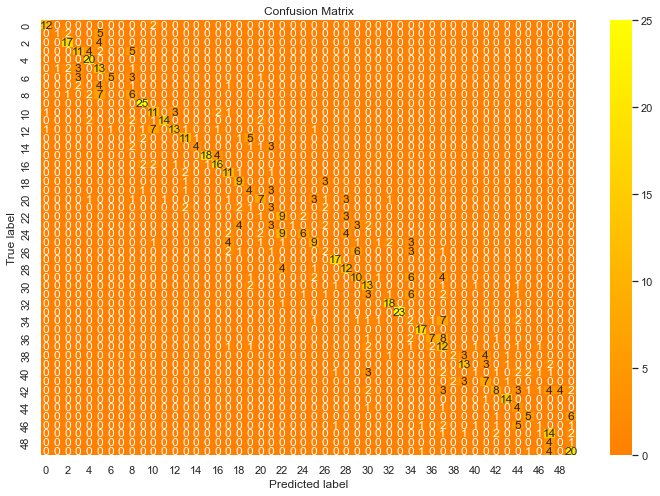

In [66]:
logreg = LogisticRegression(solver='newton-cg', C=1, multi_class = "multinomial", max_iter=1000 ,random_state=1, n_jobs = -1)
logreg.fit(df_train, y_train)
        
y_predict_train_logreg = logreg.predict(df_train)
y_predict_test_logreg = logreg.predict(df_test)


cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)



In [ ]:
# as we can see, the diagonal of the confusion matrix is quite outlined.
# so the predicted and the actual values tend to converge.
# some sparse value still present.

In [77]:
# let's find the best combination when training a decision tree

auc_scores = []
accuracy_scores = []

for criterion_var in tqdm(['gini', 'entropy']):
    for max_depth_var in tqdm([3, 30, 300, 3000]):
        for min_samples_leaf_var in tqdm([1, 5, 10, 20]):

            dtc = DecisionTreeClassifier(criterion = criterion_var, random_state = 1,
                                   max_depth=max_depth_var, min_samples_leaf=min_samples_leaf_var)
            dtc.fit(df_train, y_train)

            y_predict_train_dtc = dtc.predict(df_train)
            y_predict_test_dtc = dtc.predict(df_test)

            train_accuracy_score_dtc = accuracy_score(y_train, y_predict_train_dtc)
            test_accuracy_score_dtc = accuracy_score(y_test, y_predict_test_dtc)

            train_rocauc_score_dtc = roc_auc_score(y_train, dtc.predict_proba(df_train), multi_class='ovr')
            test_rocauc_score_dtc = roc_auc_score(y_test, dtc.predict_proba(df_test), multi_class='ovr')

            auc_scores.append(test_rocauc_score_dtc)
            accuracy_scores.append(test_accuracy_score_dtc)

            print('criterion=%s max_depth=%s min_sampleleaf=%s aucvalue: %.3f accuracy: %.3f ' % (criterion_var, max_depth_var, min_samples_leaf_var, test_rocauc_score_dtc, test_accuracy_score_dtc))


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

criterion=gini max_depth=3 min_sampleleaf=1 aucvalue: 0.793 accuracy: 0.098 
criterion=gini max_depth=3 min_sampleleaf=5 aucvalue: 0.793 accuracy: 0.098 
criterion=gini max_depth=3 min_sampleleaf=10 aucvalue: 0.793 accuracy: 0.098 
criterion=gini max_depth=3 min_sampleleaf=20 aucvalue: 0.793 accuracy: 0.098 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=gini max_depth=30 min_sampleleaf=1 aucvalue: 0.997 accuracy: 0.993 
criterion=gini max_depth=30 min_sampleleaf=5 aucvalue: 0.998 accuracy: 0.995 
criterion=gini max_depth=30 min_sampleleaf=10 aucvalue: 0.998 accuracy: 0.995 
criterion=gini max_depth=30 min_sampleleaf=20 aucvalue: 0.998 accuracy: 0.995 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=gini max_depth=300 min_sampleleaf=1 aucvalue: 0.997 accuracy: 0.993 
criterion=gini max_depth=300 min_sampleleaf=5 aucvalue: 0.998 accuracy: 0.995 
criterion=gini max_depth=300 min_sampleleaf=10 aucvalue: 0.998 accuracy: 0.995 
criterion=gini max_depth=300 min_sampleleaf=20 aucvalue: 0.998 accuracy: 0.995 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=gini max_depth=3000 min_sampleleaf=1 aucvalue: 0.997 accuracy: 0.993 
criterion=gini max_depth=3000 min_sampleleaf=5 aucvalue: 0.998 accuracy: 0.995 
criterion=gini max_depth=3000 min_sampleleaf=10 aucvalue: 0.998 accuracy: 0.995 
criterion=gini max_depth=3000 min_sampleleaf=20 aucvalue: 0.998 accuracy: 0.995 


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

criterion=entropy max_depth=3 min_sampleleaf=1 aucvalue: 0.946 accuracy: 0.156 
criterion=entropy max_depth=3 min_sampleleaf=5 aucvalue: 0.946 accuracy: 0.156 
criterion=entropy max_depth=3 min_sampleleaf=10 aucvalue: 0.946 accuracy: 0.156 
criterion=entropy max_depth=3 min_sampleleaf=20 aucvalue: 0.946 accuracy: 0.156 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=entropy max_depth=30 min_sampleleaf=1 aucvalue: 0.999 accuracy: 0.998 
criterion=entropy max_depth=30 min_sampleleaf=5 aucvalue: 0.999 accuracy: 0.996 
criterion=entropy max_depth=30 min_sampleleaf=10 aucvalue: 0.999 accuracy: 0.996 
criterion=entropy max_depth=30 min_sampleleaf=20 aucvalue: 0.999 accuracy: 0.996 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=entropy max_depth=300 min_sampleleaf=1 aucvalue: 0.999 accuracy: 0.998 
criterion=entropy max_depth=300 min_sampleleaf=5 aucvalue: 0.999 accuracy: 0.996 
criterion=entropy max_depth=300 min_sampleleaf=10 aucvalue: 0.999 accuracy: 0.996 
criterion=entropy max_depth=300 min_sampleleaf=20 aucvalue: 0.999 accuracy: 0.996 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=entropy max_depth=3000 min_sampleleaf=1 aucvalue: 0.999 accuracy: 0.998 
criterion=entropy max_depth=3000 min_sampleleaf=5 aucvalue: 0.999 accuracy: 0.996 
criterion=entropy max_depth=3000 min_sampleleaf=10 aucvalue: 0.999 accuracy: 0.996 
criterion=entropy max_depth=3000 min_sampleleaf=20 aucvalue: 0.999 accuracy: 0.996 


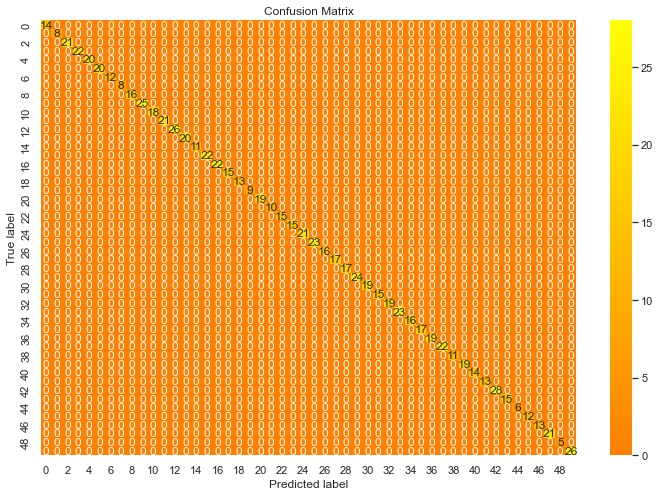

In [78]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 1,
                                   max_depth=3000, min_samples_leaf=1)
dtc.fit(df_train, y_train)

y_predict_train_dtc = dtc.predict(df_train)
y_predict_test_dtc = dtc.predict(df_test)


#cm_dtc = confusion_matrix(y_train,y_predict_train_dtc)

cm_dtc = confusion_matrix(y_test,y_predict_test_dtc)
draw_confusion_matrix(cm_dtc)


In [ ]:
# this seems clearly overfitting.
# even if, for the kind f problem, it would probably be the best solution.
# anyway, it's not clear how it would behave with unseen data.


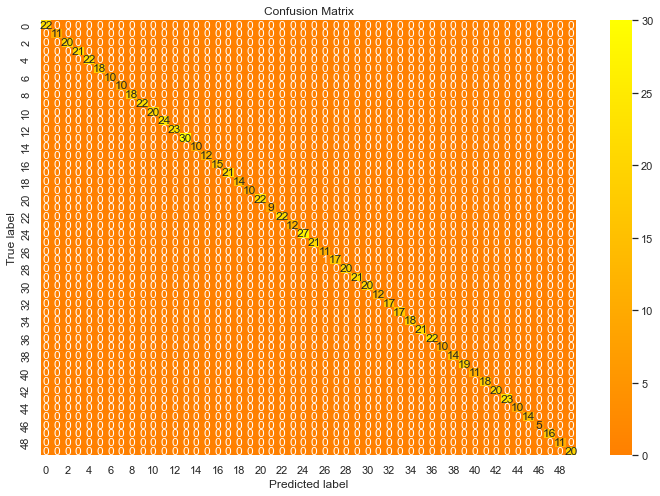

In [79]:

y_predict_val_dtc = dtc.predict(df_val)

cm_dtc_val = confusion_matrix(y_val,y_predict_val_dtc)
draw_confusion_matrix(cm_dtc_val)

In [83]:
# let's find the best combination when training a random forest

from sklearn.metrics import accuracy_score, confusion_matrix

auc_scores = []
accuracy_scores = []

for criterion_var in tqdm(['gini', 'entropy']):
    for estimators_var in tqdm([10, 50, 100, 500, 1000]):
        for max_depth_var in tqdm([1, 5, 10, 30]):


            rf = RandomForestClassifier(random_state=1, n_estimators=estimators_var, max_depth=max_depth_var, criterion = criterion_var, 
                                        min_samples_leaf= 1,min_samples_split= 2)
            rf.fit(df_train, y_train)

            y_predict_train_rf = rf.predict(df_train)
            y_predict_test_rf = rf.predict(df_test)

            train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
            test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

            train_rocauc_score_rf = roc_auc_score(y_train, rf.predict_proba(df_train), multi_class='ovr')
            test_rocauc_score_rf = roc_auc_score(y_test, rf.predict_proba(df_test), multi_class='ovr')

            auc_scores.append(test_rocauc_score_rf)
            accuracy_scores.append(test_accuracy_score_rf)

            print('criterion=%s estimators=%s max_depth=%s  aucvalue: %.3f accuracy: %.3f ' % (criterion_var, estimators_var, max_depth_var, test_rocauc_score_rf, test_accuracy_score_rf))


print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

criterion=gini estimators=10 max_depth=1  aucvalue: 0.840 accuracy: 0.189 
criterion=gini estimators=10 max_depth=5  aucvalue: 0.963 accuracy: 0.535 
criterion=gini estimators=10 max_depth=10  aucvalue: 0.985 accuracy: 0.768 
criterion=gini estimators=10 max_depth=30  aucvalue: 0.976 accuracy: 0.770 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=gini estimators=50 max_depth=1  aucvalue: 0.919 accuracy: 0.258 
criterion=gini estimators=50 max_depth=5  aucvalue: 0.977 accuracy: 0.636 
criterion=gini estimators=50 max_depth=10  aucvalue: 0.994 accuracy: 0.825 
criterion=gini estimators=50 max_depth=30  aucvalue: 0.998 accuracy: 0.884 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=gini estimators=100 max_depth=1  aucvalue: 0.924 accuracy: 0.249 
criterion=gini estimators=100 max_depth=5  aucvalue: 0.980 accuracy: 0.628 
criterion=gini estimators=100 max_depth=10  aucvalue: 0.996 accuracy: 0.843 
criterion=gini estimators=100 max_depth=30  aucvalue: 0.998 accuracy: 0.903 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=gini estimators=500 max_depth=1  aucvalue: 0.954 accuracy: 0.262 
criterion=gini estimators=500 max_depth=5  aucvalue: 0.987 accuracy: 0.671 
criterion=gini estimators=500 max_depth=10  aucvalue: 0.996 accuracy: 0.861 
criterion=gini estimators=500 max_depth=30  aucvalue: 0.999 accuracy: 0.903 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=gini estimators=1000 max_depth=1  aucvalue: 0.959 accuracy: 0.306 
criterion=gini estimators=1000 max_depth=5  aucvalue: 0.987 accuracy: 0.682 
criterion=gini estimators=1000 max_depth=10  aucvalue: 0.996 accuracy: 0.863 
criterion=gini estimators=1000 max_depth=30  aucvalue: 0.999 accuracy: 0.912 


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

criterion=entropy estimators=10 max_depth=1  aucvalue: 0.916 accuracy: 0.187 
criterion=entropy estimators=10 max_depth=5  aucvalue: 0.987 accuracy: 0.664 
criterion=entropy estimators=10 max_depth=10  aucvalue: 0.996 accuracy: 0.860 
criterion=entropy estimators=10 max_depth=30  aucvalue: 0.992 accuracy: 0.871 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=entropy estimators=50 max_depth=1  aucvalue: 0.935 accuracy: 0.213 
criterion=entropy estimators=50 max_depth=5  aucvalue: 0.995 accuracy: 0.757 
criterion=entropy estimators=50 max_depth=10  aucvalue: 0.999 accuracy: 0.918 
criterion=entropy estimators=50 max_depth=30  aucvalue: 0.999 accuracy: 0.937 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=entropy estimators=100 max_depth=1  aucvalue: 0.937 accuracy: 0.218 
criterion=entropy estimators=100 max_depth=5  aucvalue: 0.995 accuracy: 0.754 
criterion=entropy estimators=100 max_depth=10  aucvalue: 0.999 accuracy: 0.929 
criterion=entropy estimators=100 max_depth=30  aucvalue: 0.999 accuracy: 0.943 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=entropy estimators=500 max_depth=1  aucvalue: 0.941 accuracy: 0.219 
criterion=entropy estimators=500 max_depth=5  aucvalue: 0.995 accuracy: 0.771 
criterion=entropy estimators=500 max_depth=10  aucvalue: 0.999 accuracy: 0.944 
criterion=entropy estimators=500 max_depth=30  aucvalue: 0.999 accuracy: 0.943 


  0%|          | 0/4 [00:00<?, ?it/s]

criterion=entropy estimators=1000 max_depth=1  aucvalue: 0.942 accuracy: 0.215 
criterion=entropy estimators=1000 max_depth=5  aucvalue: 0.996 accuracy: 0.774 
criterion=entropy estimators=1000 max_depth=10  aucvalue: 0.999 accuracy: 0.945 
criterion=entropy estimators=1000 max_depth=30  aucvalue: 0.999 accuracy: 0.944 
1.0
0.9438596491228071


In [ ]:
#best choice: 
# criterion=entropy estimators=1000 max_depth=10  aucvalue: 0.999 accuracy: 0.945
        

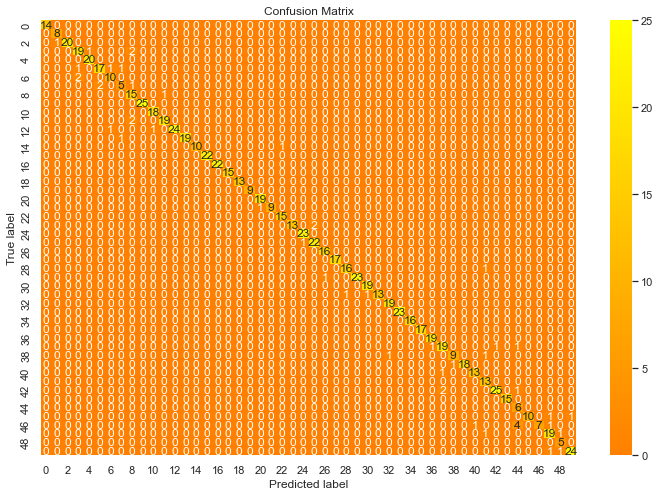

In [51]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)

In [86]:
#XGBoost

auc_scores = []
accuracy_scores = []

for learning_rate_var in tqdm([0.001, 0.01, 0.1, 1]):
    for estimators_var in tqdm([10, 50, 100, 200, 500]):
        for max_depth_var in tqdm([1, 5, 10, 30]):


            xgbc = xgb.XGBClassifier(max_depth=max_depth_var, n_estimators=estimators_var, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=learning_rate_var)
            xgbc.fit(df_train, y_train)

            y_predict_train_xgb = xgbc.predict(df_train)
            y_predict_test_xgb = xgbc.predict(df_test)

            train_accuracy_score_xgb = accuracy_score(y_train, y_predict_train_xgb)
            test_accuracy_score_xgb = accuracy_score(y_test, y_predict_test_xgb)

            train_rocauc_score_xgb = roc_auc_score(y_train, xgbc.predict_proba(df_train), multi_class='ovr')
            test_rocauc_score_xgb = roc_auc_score(y_test, xgbc.predict_proba(df_test), multi_class='ovr')

            auc_scores.append(test_rocauc_score_xgb)
            accuracy_scores.append(test_accuracy_score_xgb)

            print('learning_rate=%s estimators=%s max_depth=%s  aucvalue: %.3f accuracy: %.3f ' % (learning_rate_var, estimators_var, max_depth_var, test_rocauc_score_xgb, test_accuracy_score_xgb))




  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.001 estimators=10 max_depth=1  aucvalue: 0.972 accuracy: 0.540 
learning_rate=0.001 estimators=10 max_depth=5  aucvalue: 0.999 accuracy: 0.967 
learning_rate=0.001 estimators=10 max_depth=10  aucvalue: 0.999 accuracy: 0.967 
learning_rate=0.001 estimators=10 max_depth=30  aucvalue: 0.999 accuracy: 0.967 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.001 estimators=50 max_depth=1  aucvalue: 0.981 accuracy: 0.580 
learning_rate=0.001 estimators=50 max_depth=5  aucvalue: 1.000 accuracy: 0.988 
learning_rate=0.001 estimators=50 max_depth=10  aucvalue: 1.000 accuracy: 0.989 
learning_rate=0.001 estimators=50 max_depth=30  aucvalue: 1.000 accuracy: 0.989 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.001 estimators=100 max_depth=1  aucvalue: 0.982 accuracy: 0.607 
learning_rate=0.001 estimators=100 max_depth=5  aucvalue: 1.000 accuracy: 0.992 
learning_rate=0.001 estimators=100 max_depth=10  aucvalue: 1.000 accuracy: 0.992 
learning_rate=0.001 estimators=100 max_depth=30  aucvalue: 1.000 accuracy: 0.992 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.001 estimators=200 max_depth=1  aucvalue: 0.984 accuracy: 0.646 
learning_rate=0.001 estimators=200 max_depth=5  aucvalue: 1.000 accuracy: 0.993 
learning_rate=0.001 estimators=200 max_depth=10  aucvalue: 1.000 accuracy: 0.993 
learning_rate=0.001 estimators=200 max_depth=30  aucvalue: 1.000 accuracy: 0.993 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.001 estimators=500 max_depth=1  aucvalue: 0.989 accuracy: 0.690 
learning_rate=0.001 estimators=500 max_depth=5  aucvalue: 1.000 accuracy: 0.996 
learning_rate=0.001 estimators=500 max_depth=10  aucvalue: 1.000 accuracy: 0.996 
learning_rate=0.001 estimators=500 max_depth=30  aucvalue: 1.000 accuracy: 0.996 


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.01 estimators=10 max_depth=1  aucvalue: 0.977 accuracy: 0.601 
learning_rate=0.01 estimators=10 max_depth=5  aucvalue: 0.999 accuracy: 0.979 
learning_rate=0.01 estimators=10 max_depth=10  aucvalue: 0.999 accuracy: 0.980 
learning_rate=0.01 estimators=10 max_depth=30  aucvalue: 0.999 accuracy: 0.980 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.01 estimators=50 max_depth=1  aucvalue: 0.989 accuracy: 0.692 
learning_rate=0.01 estimators=50 max_depth=5  aucvalue: 1.000 accuracy: 0.998 
learning_rate=0.01 estimators=50 max_depth=10  aucvalue: 1.000 accuracy: 0.998 
learning_rate=0.01 estimators=50 max_depth=30  aucvalue: 1.000 accuracy: 0.998 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.01 estimators=100 max_depth=1  aucvalue: 0.994 accuracy: 0.794 
learning_rate=0.01 estimators=100 max_depth=5  aucvalue: 1.000 accuracy: 0.996 
learning_rate=0.01 estimators=100 max_depth=10  aucvalue: 1.000 accuracy: 0.996 
learning_rate=0.01 estimators=100 max_depth=30  aucvalue: 1.000 accuracy: 0.996 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.01 estimators=200 max_depth=1  aucvalue: 0.997 accuracy: 0.856 
learning_rate=0.01 estimators=200 max_depth=5  aucvalue: 1.000 accuracy: 0.998 
learning_rate=0.01 estimators=200 max_depth=10  aucvalue: 1.000 accuracy: 0.998 
learning_rate=0.01 estimators=200 max_depth=30  aucvalue: 1.000 accuracy: 0.998 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.01 estimators=500 max_depth=1  aucvalue: 1.000 accuracy: 0.956 
learning_rate=0.01 estimators=500 max_depth=5  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.01 estimators=500 max_depth=10  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.01 estimators=500 max_depth=30  aucvalue: 1.000 accuracy: 0.999 


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.1 estimators=10 max_depth=1  aucvalue: 0.992 accuracy: 0.765 
learning_rate=0.1 estimators=10 max_depth=5  aucvalue: 1.000 accuracy: 0.985 
learning_rate=0.1 estimators=10 max_depth=10  aucvalue: 1.000 accuracy: 0.986 
learning_rate=0.1 estimators=10 max_depth=30  aucvalue: 1.000 accuracy: 0.986 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.1 estimators=50 max_depth=1  aucvalue: 1.000 accuracy: 0.953 
learning_rate=0.1 estimators=50 max_depth=5  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.1 estimators=50 max_depth=10  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.1 estimators=50 max_depth=30  aucvalue: 1.000 accuracy: 0.999 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.1 estimators=100 max_depth=1  aucvalue: 1.000 accuracy: 0.993 
learning_rate=0.1 estimators=100 max_depth=5  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.1 estimators=100 max_depth=10  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.1 estimators=100 max_depth=30  aucvalue: 1.000 accuracy: 0.999 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.1 estimators=200 max_depth=1  aucvalue: 1.000 accuracy: 0.998 
learning_rate=0.1 estimators=200 max_depth=5  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.1 estimators=200 max_depth=10  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.1 estimators=200 max_depth=30  aucvalue: 1.000 accuracy: 0.999 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=0.1 estimators=500 max_depth=1  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.1 estimators=500 max_depth=5  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.1 estimators=500 max_depth=10  aucvalue: 1.000 accuracy: 0.999 
learning_rate=0.1 estimators=500 max_depth=30  aucvalue: 1.000 accuracy: 0.999 


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=1 estimators=10 max_depth=1  aucvalue: 0.838 accuracy: 0.191 
learning_rate=1 estimators=10 max_depth=5  aucvalue: 0.999 accuracy: 0.961 
learning_rate=1 estimators=10 max_depth=10  aucvalue: 0.999 accuracy: 0.959 
learning_rate=1 estimators=10 max_depth=30  aucvalue: 0.999 accuracy: 0.959 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=1 estimators=50 max_depth=1  aucvalue: 0.992 accuracy: 0.688 
learning_rate=1 estimators=50 max_depth=5  aucvalue: 0.999 accuracy: 0.964 
learning_rate=1 estimators=50 max_depth=10  aucvalue: 0.999 accuracy: 0.967 
learning_rate=1 estimators=50 max_depth=30  aucvalue: 0.999 accuracy: 0.967 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=1 estimators=100 max_depth=1  aucvalue: 0.997 accuracy: 0.842 
learning_rate=1 estimators=100 max_depth=5  aucvalue: 0.999 accuracy: 0.964 
learning_rate=1 estimators=100 max_depth=10  aucvalue: 0.999 accuracy: 0.966 
learning_rate=1 estimators=100 max_depth=30  aucvalue: 0.999 accuracy: 0.966 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=1 estimators=200 max_depth=1  aucvalue: 0.998 accuracy: 0.877 
learning_rate=1 estimators=200 max_depth=5  aucvalue: 0.999 accuracy: 0.961 
learning_rate=1 estimators=200 max_depth=10  aucvalue: 0.999 accuracy: 0.966 
learning_rate=1 estimators=200 max_depth=30  aucvalue: 0.999 accuracy: 0.966 


  0%|          | 0/4 [00:00<?, ?it/s]

learning_rate=1 estimators=500 max_depth=1  aucvalue: 0.999 accuracy: 0.936 
learning_rate=1 estimators=500 max_depth=5  aucvalue: 0.999 accuracy: 0.961 
learning_rate=1 estimators=500 max_depth=10  aucvalue: 0.999 accuracy: 0.968 
learning_rate=1 estimators=500 max_depth=30  aucvalue: 0.999 accuracy: 0.968 


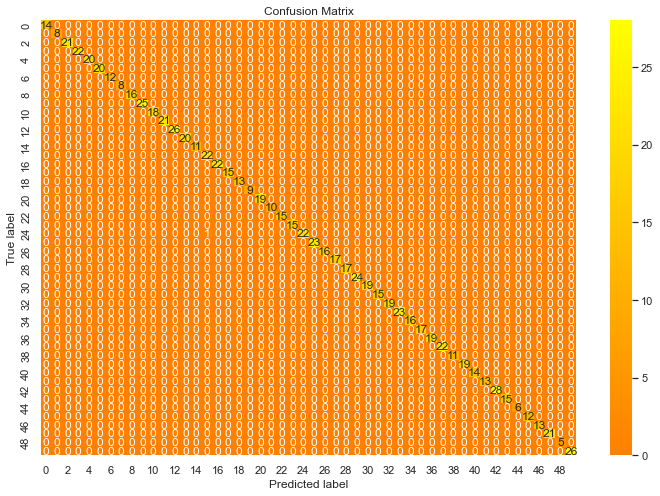

In [88]:
#not so many differences, but best combination with the lowest footprint for XGBoost seems
# learning_rate=0.1 estimators=50 max_depth=5  aucvalue: 1.000 accuracy: 0.999 

xgbc = xgb.XGBClassifier(max_depth=5, n_estimators=50, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)

xgbc.fit(df_train, y_train)
y_predict_test_xgb = xgbc.predict(df_test)

cm_xgb = confusion_matrix(y_test,y_predict_test_xgb)
draw_confusion_matrix(cm_xgb)




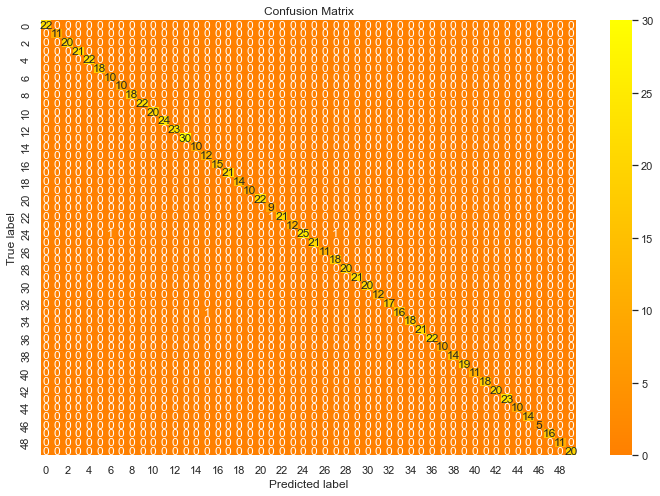

In [89]:
y_predict_val_xgb = xgbc.predict(df_val)

cm_xgb2 = confusion_matrix(y_val,y_predict_val_xgb)
draw_confusion_matrix(cm_xgb2)


In [ ]:

# let's now see how it works with a neural network.
# we're going to apply Kera's ensorflow to a tabular dataset.
# it will be hard to win over XGBoost 


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

tf.convert_to_tensor